In [1]:
import pandas as pd

import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (50,50)

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [10]:
data = pd.read_csv('/content/gdrive/My Drive/ML projects/Amex Analytics/TrainingData.csv', low_memory=False)
print(data.shape)
data.head()

(83000, 50)


,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,10,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,732,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,89,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,3,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,5,0


In [11]:
testdata = pd.read_csv('/content/gdrive/My Drive/ML projects/Amex Analytics/testX.csv', low_memory=False)
print(testdata.shape)
testdata.head()

(47000, 49)


,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48
0,578069,1719,0.6174,8.623,0.0,0.0,258,258,258,10729,307,1141,40,0,49550,83387,0,0,0,0,1,NaN,6125.00,1333.33,13.33,1399,1734,122,0,3650,3437,missing,184,5.1667,0,0,3,3,2,0,missing,missing,0.54545,2,0.91837,0,0,C,3247
1,578070,1795,0.2051,0.000,0.0,0.0,1685,12711,8913,80519,18099,missing,3457,455,198200,458833,0,0,0,0,0,25.050,2385.71,2385.71,0.00,1440,2464,2220,760,7330,2525,missing,852,3.0833,0,0,2,13,4,0,missing,missing,0.17241,4,0.94563,0,0,C,18
2,578071,1742,0.5082,0.000,0.0,0.0,1185,8954,8954,1189,1185,missing,3028,1453,122884,missing,0,0,0,0,0,20.340,33.33,33.33,0.33,2716,5384,5384,669,14478,3711,missing,625,0.5833,0,0,1,3,1,0,missing,missing,0.64706,1,0.97054,0,0,C,11
3,578072,1685,0.2595,25.409,0.0,0.0,missing,3354,missing,missing,3354,4231,missing,missing,118920,375589,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,0,2373,missing,missing,missing,0.4167,0,na,6,na,2,0,missing,missing,0.85714,1,1.00000,na,0,C,32
4,578073,1666,1.2678,0.000,0.0,0.0,570,570,570,missing,570,missing,74,missing,42613,missing,0,0,0,0,0,11.538,1153.85,1153.85,NaN,0,0,0,0,1551,30,missing,0,0.1667,0,0,1,0,2,0,missing,101.61,missing,0,0.99617,na,0,L,89


In [12]:
data=data.applymap(lambda x : np.nan if x=='missing' else x)
data=data.applymap(lambda x : np.nan if x=='na' else x)
data=data.applymap(lambda x : np.nan if x=='N/A' else x)
cols = data.columns.drop('mvar47')
data[cols] = data[cols].apply(pd.to_numeric)
data.mvar47.replace(('C', 'L'), (0, 1), inplace = True)
data.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,default_ind
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,NaN,6423.0,3067.0,123875,NaN,1.0,1.0,1.0,3.0,3.0,94.78,8987.18,NaN,72.25,1462.0,4532.0,2890.0,61.0,4532.0,1095.0,3376.0,625.0,1.1667,1.0,0.0,8.0,10.0,4.0,1.0,73.780,82.547,0.08696,10.0,0.63899,NaN,0.0,0,10,0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,NaN,765.0,1931.0,42613,NaN,0.0,0.0,0.0,0.0,0.0,74.25,953.06,953.06,4.80,1028.0,2099.0,2099.0,30386.0,2281.0,NaN,2251.0,169.0,0.4167,0.0,0.0,8.0,0.0,2.0,0.0,99.129,NaN,0.00000,13.0,0.63836,NaN,NaN,1,732,1
2,230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,NaN,NaN,NaN,76109,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669.0,4623.0,3772.0,NaN,NaN,25.0833,0.0,NaN,1.0,NaN,1.0,0.0,NaN,29.290,0.00000,1.0,1.00000,NaN,0.0,0,89,1
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,NaN,0.0,0.0,84235,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00,NaN,0.00,1308.0,2525.0,791.0,91.0,5992.0,NaN,3741.0,215.0,10.3333,0.0,0.0,3.0,3.0,2.0,0.0,96.272,NaN,0.15385,3.0,0.53241,0.0,0.0,1,3,0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,NaN,2257.0,27815.0,123875,524848.0,0.0,0.0,0.0,0.0,0.0,20.51,796.67,NaN,28.72,801.0,2281.0,2281.0,487.0,2707.0,NaN,1947.0,158.0,0.9167,0.0,0.0,2.0,3.0,2.0,0.0,115.019,NaN,0.00000,1.0,0.92665,NaN,NaN,1,5,0


In [13]:
testdata=testdata.applymap(lambda x : np.nan if x=='missing' else x)
testdata=testdata.applymap(lambda x : np.nan if x=='na' else x)
testdata=testdata.applymap(lambda x : np.nan if x=='N/A' else x)
cols = testdata.columns.drop('mvar47')
testdata[cols] = testdata[cols].apply(pd.to_numeric)
testdata.mvar47.replace(('C', 'L'), (0, 1), inplace = True)

In [14]:
testdata.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48
0,578069,1719.0,0.6174,8.623,0.0,0.0,258.0,258.0,258.0,10729.0,307.0,1141.0,40.0,0.0,49550,83387.0,0.0,0.0,0.0,0.0,1.0,NaN,6125.00,1333.33,13.33,1399.0,1734.0,122.0,0.0,3650.0,3437.0,NaN,184.0,5.1667,0.0,0.0,3.0,3.0,2.0,0.0,NaN,NaN,0.54545,2.0,0.91837,0.0,0.0,0,3247
1,578070,1795.0,0.2051,0.000,0.0,0.0,1685.0,12711.0,8913.0,80519.0,18099.0,NaN,3457.0,455.0,198200,458833.0,0.0,0.0,0.0,0.0,0.0,25.050,2385.71,2385.71,0.00,1440.0,2464.0,2220.0,760.0,7330.0,2525.0,NaN,852.0,3.0833,0.0,0.0,2.0,13.0,4.0,0.0,NaN,NaN,0.17241,4.0,0.94563,0.0,0.0,0,18
2,578071,1742.0,0.5082,0.000,0.0,0.0,1185.0,8954.0,8954.0,1189.0,1185.0,NaN,3028.0,1453.0,122884,NaN,0.0,0.0,0.0,0.0,0.0,20.340,33.33,33.33,0.33,2716.0,5384.0,5384.0,669.0,14478.0,3711.0,NaN,625.0,0.5833,0.0,0.0,1.0,3.0,1.0,0.0,NaN,NaN,0.64706,1.0,0.97054,0.0,0.0,0,11
3,578072,1685.0,0.2595,25.409,0.0,0.0,NaN,3354.0,NaN,NaN,3354.0,4231.0,NaN,NaN,118920,375589.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2373.0,NaN,NaN,NaN,0.4167,0.0,NaN,6.0,NaN,2.0,0.0,NaN,NaN,0.85714,1.0,1.00000,NaN,0.0,0,32
4,578073,1666.0,1.2678,0.000,0.0,0.0,570.0,570.0,570.0,NaN,570.0,NaN,74.0,NaN,42613,NaN,0.0,0.0,0.0,0.0,0.0,11.538,1153.85,1153.85,NaN,0.0,0.0,0.0,0.0,1551.0,30.0,NaN,0.0,0.1667,0.0,0.0,1.0,0.0,2.0,0.0,NaN,101.61,NaN,0.0,0.99617,NaN,0.0,1,89


In [15]:
testdata.isna().sum()

application_key        0
mvar1               2228
mvar2               3327
mvar3                294
mvar4                294
mvar5                294
mvar6              11297
mvar7               4479
mvar8              11302
mvar9               6812
mvar10               295
mvar11             26518
mvar12              8397
mvar13              5807
mvar14                 0
mvar15             18836
mvar16             11033
mvar17              9432
mvar18              8785
mvar19                 7
mvar20               295
mvar21             13380
mvar22             17368
mvar23             23977
mvar24             11266
mvar25              4598
mvar26              6435
mvar27              7951
mvar28               295
mvar29               295
mvar30             21475
mvar31             33143
mvar32              4598
mvar33              1037
mvar34               295
mvar35             19765
mvar36              1730
mvar37              4598
mvar38               295
mvar39              3628


In [16]:
data['mvar1'].fillna((data['mvar1'].mean()), inplace=True)
data['mvar2'].fillna((data['mvar2'].mean()), inplace=True)
data['mvar3'].fillna((data['mvar3'].mean()), inplace=True)
data['mvar4'].fillna((data['mvar4'].mean()), inplace=True)
data['mvar5'].fillna((data['mvar5'].mean()), inplace=True)
data['mvar6'].fillna((data['mvar6'].median()), inplace=True)
data['mvar7'].fillna((data['mvar7'].mean()), inplace=True)
data['mvar8'].fillna((data['mvar8'].mean()), inplace=True)
data['mvar9'].fillna((data['mvar9'].mean()), inplace=True)
data['mvar10'].fillna((data['mvar10'].mean()), inplace=True)
data['mvar11'].fillna((data['mvar11'].mean()), inplace=True)
data['mvar12'].fillna((data['mvar12'].mean()), inplace=True)
data['mvar13'].fillna((data['mvar13'].mean()), inplace=True)
data['mvar14'].fillna((data['mvar14'].mean()), inplace=True)
data['mvar15'].fillna((data['mvar15'].mean()), inplace=True)
data['mvar16'].fillna((data['mvar16'].mean()), inplace=True)
data['mvar17'].fillna((data['mvar17'].mean()), inplace=True)
data['mvar18'].fillna((data['mvar18'].mean()), inplace=True)
data['mvar19'].fillna((data['mvar19'].mean()), inplace=True)
data['mvar20'].fillna((data['mvar20'].mean()), inplace=True)
data['mvar21'].fillna((data['mvar21'].mean()), inplace=True)
data['mvar22'].fillna((data['mvar22'].mean()), inplace=True)
data['mvar23'].fillna((data['mvar23'].mean()), inplace=True)
data['mvar24'].fillna((data['mvar24'].mean()), inplace=True)
data['mvar25'].fillna((data['mvar25'].mean()), inplace=True)
data['mvar26'].fillna((data['mvar26'].mean()), inplace=True)
data['mvar27'].fillna((data['mvar27'].mean()), inplace=True)
data['mvar28'].fillna((data['mvar28'].mean()), inplace=True)
data['mvar29'].fillna((data['mvar29'].mean()), inplace=True)
data['mvar30'].fillna((data['mvar30'].mean()), inplace=True)
data['mvar31'].fillna((data['mvar31'].mean()), inplace=True)
data['mvar32'].fillna((data['mvar32'].median()), inplace=True)
data['mvar33'].fillna((data['mvar33'].median()), inplace=True)
data['mvar34'].fillna((data['mvar34'].mean()), inplace=True)
data['mvar35'].fillna((data['mvar35'].mean()), inplace=True)
data['mvar36'].fillna((data['mvar36'].mean()), inplace=True)
data['mvar37'].fillna((data['mvar37'].mean()), inplace=True)
data['mvar38'].fillna((data['mvar38'].mean()), inplace=True)
data['mvar39'].fillna((data['mvar39'].mean()), inplace=True)
data['mvar40'].fillna((data['mvar40'].mean()), inplace=True)
data['mvar41'].fillna((data['mvar41'].mean()), inplace=True)
data['mvar42'].fillna((data['mvar42'].mean()), inplace=True)
data['mvar43'].fillna((data['mvar43'].mean()), inplace=True)
data['mvar44'].fillna((data['mvar44'].median()), inplace=True)
data['mvar45'].fillna((data['mvar45'].mean()), inplace=True)
data['mvar46'].fillna((data['mvar46'].mean()), inplace=True)
data['mvar47'].fillna((data['mvar47'].mode()), inplace=True)

In [17]:
testdata['mvar1'].fillna((testdata['mvar1'].mean()), inplace=True)
testdata['mvar2'].fillna((testdata['mvar2'].mean()), inplace=True)
testdata['mvar3'].fillna((testdata['mvar3'].mean()), inplace=True)
testdata['mvar4'].fillna((testdata['mvar4'].mean()), inplace=True)
testdata['mvar5'].fillna((testdata['mvar5'].mean()), inplace=True)
testdata['mvar6'].fillna((testdata['mvar6'].median()), inplace=True)
testdata['mvar7'].fillna((testdata['mvar7'].mean()), inplace=True)
testdata['mvar8'].fillna((testdata['mvar8'].mean()), inplace=True)
testdata['mvar9'].fillna((testdata['mvar9'].mean()), inplace=True)
testdata['mvar10'].fillna((testdata['mvar10'].mean()), inplace=True)
testdata['mvar11'].fillna((testdata['mvar11'].mean()), inplace=True)
testdata['mvar12'].fillna((testdata['mvar12'].mean()), inplace=True)
testdata['mvar13'].fillna((testdata['mvar13'].mean()), inplace=True)
testdata['mvar14'].fillna((testdata['mvar14'].mean()), inplace=True)
testdata['mvar15'].fillna((testdata['mvar15'].mean()), inplace=True)
testdata['mvar16'].fillna((testdata['mvar16'].mean()), inplace=True)
testdata['mvar17'].fillna((testdata['mvar17'].mean()), inplace=True)
testdata['mvar18'].fillna((testdata['mvar18'].mean()), inplace=True)
testdata['mvar19'].fillna((testdata['mvar19'].mean()), inplace=True)
testdata['mvar20'].fillna((testdata['mvar20'].mean()), inplace=True)
testdata['mvar21'].fillna((testdata['mvar21'].mean()), inplace=True)
testdata['mvar22'].fillna((testdata['mvar22'].mean()), inplace=True)
testdata['mvar23'].fillna((testdata['mvar23'].mean()), inplace=True)
testdata['mvar24'].fillna((testdata['mvar24'].mean()), inplace=True)
testdata['mvar25'].fillna((testdata['mvar25'].mean()), inplace=True)
testdata['mvar26'].fillna((testdata['mvar26'].mean()), inplace=True)
testdata['mvar27'].fillna((testdata['mvar27'].mean()), inplace=True)
testdata['mvar28'].fillna((testdata['mvar28'].mean()), inplace=True)
testdata['mvar29'].fillna((testdata['mvar29'].mean()), inplace=True)
testdata['mvar30'].fillna((testdata['mvar30'].mean()), inplace=True)
testdata['mvar31'].fillna((testdata['mvar31'].mean()), inplace=True)
testdata['mvar32'].fillna((testdata['mvar32'].median()), inplace=True)
testdata['mvar33'].fillna((testdata['mvar33'].median()), inplace=True)
testdata['mvar34'].fillna((testdata['mvar34'].mean()), inplace=True)
testdata['mvar35'].fillna((testdata['mvar35'].mean()), inplace=True)
testdata['mvar36'].fillna((testdata['mvar36'].mean()), inplace=True)
testdata['mvar37'].fillna((testdata['mvar37'].mean()), inplace=True)
testdata['mvar38'].fillna((testdata['mvar38'].mean()), inplace=True)
testdata['mvar39'].fillna((testdata['mvar39'].mean()), inplace=True)
testdata['mvar40'].fillna((testdata['mvar40'].mean()), inplace=True)
testdata['mvar41'].fillna((testdata['mvar41'].mean()), inplace=True)
testdata['mvar42'].fillna((testdata['mvar42'].mean()), inplace=True)
testdata['mvar43'].fillna((testdata['mvar43'].mean()), inplace=True)
testdata['mvar44'].fillna((testdata['mvar44'].median()), inplace=True)
testdata['mvar45'].fillna((testdata['mvar45'].mean()), inplace=True)
testdata['mvar46'].fillna((testdata['mvar46'].mean()), inplace=True)
testdata['mvar47'].fillna((testdata['mvar47'].mode()), inplace=True)

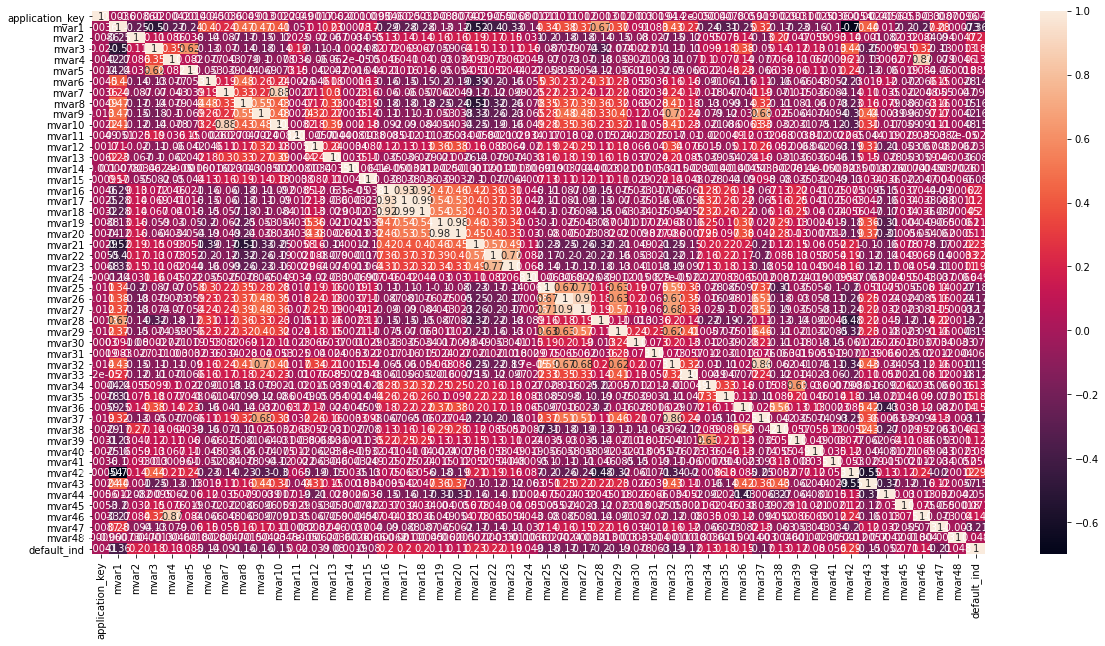

In [18]:
Var_Corr = data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [19]:
data['mvar49'] = data['mvar3'] + data['mvar4'] + data['mvar5']
testdata['mvar49'] = testdata['mvar3'] + testdata['mvar4'] + testdata['mvar5']
data['mvar50'] = data['mvar7'] + data['mvar8']
testdata['mvar50'] = testdata['mvar7']+testdata['mvar8']
data['mvar51'] = data['mvar14'] + data['mvar15']
testdata['mvar51'] = testdata['mvar14'] + testdata['mvar15']

In [24]:
X = data.drop(['default_ind','application_key','mvar18','mvar20'], axis=1)
y=data['default_ind']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [26]:
from xgboost import XGBClassifier  #Import packages related to Model
from sklearn.preprocessing import RobustScaler

param = {'max_depth': 2, 'eta': 0.1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

# evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 10
# bst = XGBClassifier.train(param, dtrain, num_round, evallist)

Model = "XGBClassifier(RobustScaler(learning_rate=0.1, max_depth=8, min_child_weight=17, n_estimators=100, nthread=1, subsample=1.0))"
model=XGBClassifier(learning_rate=0.1, max_depth=8, min_child_weight=17, n_estimators=100, nthread=1, subsample=1.0) #Create the Model

# train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10875   948]
 [ 2797  1980]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85     11823
           1       0.68      0.41      0.51      4777

    accuracy                           0.77     16600
   macro avg       0.74      0.67      0.68     16600
weighted avg       0.76      0.77      0.76     16600



In [ ]:
X_final=testdata.drop(['application_key','mvar18','mvar20'], axis=1)
y_final = model.predict(X_final)

In [ ]:
df = pd.DataFrame({"default_ind" : y_final})
df.to_csv("16_1.csv", index=False, header=False)